<a href="https://colab.research.google.com/github/robertosgpontes/osem/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Formulação Geral do Problema

O problema apresentado pode ser formulado através de uma

\begin{equation}
	\max  \sum_{i=1}^{n}{[A_{i}^1-(A_{i}^2-A_{i}^3)]X_i} = \max \sum_{i=1}^{n}{C_{i}^1X_i}
\end{equation}
e
\begin{equation}
\min \sum_{i=1}^{n}{C_{i}^2X_i}
\end{equation}


Sujeito a
\begin{equation}
x_1 \leq b_1
\end{equation}
\begin{equation}
x_2 \leq b_2
\end{equation}
\begin{equation}
x_3 \leq b_3
\end{equation}
\begin{equation}
x_1 + x_3 \leq b_4
\end{equation}
\begin{equation}
x_1 + x_2 + x_3 + x_4 = b_5
\end{equation}
\begin{equation}
x_1 \geq b_6
\end{equation}
\begin{equation}
x_2 \geq b_7
\end{equation}
\begin{equation}
x_1, x_2, x_3, x_4 \geq 0
\end{equation}


# Methodology

https://www.supplychaindataanalytics.com/multi-objective-linear-optimization-with-pulp-in-python/

https://pythonhealthcare.org/tag/pareto-front/



### Approach 1: Solution with Hierarchical Methodology

Maximizing for one objective, then adding it as a constraint and solving for the other objective

#### 1.1. First Step

\begin{equation}
S_1 = \max \sum_{i=1}^{n}{C_{i}^1X_i}
\end{equation}

Sujeito a
\begin{equation}
x_1 \leq b_1
\end{equation}
\begin{equation}
x_2 \leq b_2
\end{equation}
\begin{equation}
x_3 \leq b_3
\end{equation}
\begin{equation}
x_1 + x_3 \leq b_4
\end{equation}
\begin{equation}
x_1 + x_2 + x_3 + x_4 = b_5
\end{equation}
\begin{equation}
x_1 \geq b_6
\end{equation}
\begin{equation}
x_2 \geq b_7
\end{equation}
\begin{equation}
x_1, x_2, x_3, x_4 \geq 0
\end{equation}

#### 1.2. Second Step


\begin{equation}
\min \sum_{i=1}^{n}{C_{i}^2X_i}
\end{equation}
Sujeito a
\begin{equation}
x_1 \leq b_1
\end{equation}
\begin{equation}
x_2 \leq b_2
\end{equation}
\begin{equation}
x_3 \leq b_3
\end{equation}
\begin{equation}
x_1 + x_3 \leq b_4
\end{equation}
\begin{equation}
x_1 + x_2 + x_3 + x_4 = b_5
\end{equation}
\begin{equation}
x_1 \geq b_6
\end{equation}
\begin{equation}
x_2 \geq b_7
\end{equation}
\begin{equation}
\max \sum_{i=1}^{n}{C_{i}^1X_i} \geq S_1
\end{equation}
\begin{equation}
x_1, x_2, x_3, x_4 \geq 0
\end{equation}


## Approach 2: Solution with ...

\begin{equation}
	\max  \alpha\sum_{i=1}^{n}{C_{i}^1X_i} - (1-\alpha)\sum_{i=1}^{n}{C_{i}^2X_i}
\end{equation}

Sujeito a
\begin{equation}
x_1 \leq b_1
\end{equation}
\begin{equation}
x_2 \leq b_2
\end{equation}
\begin{equation}
x_3 \leq b_3
\end{equation}
\begin{equation}
x_1 + x_3 \leq b_4
\end{equation}
\begin{equation}
x_1 + x_2 + x_3 + x_4 = b_5
\end{equation}
\begin{equation}
x_1 \geq b_6
\end{equation}
\begin{equation}
x_2 \geq b_7
\end{equation}
\begin{equation}
x_1, x_2, x_3, x_4 \geq 0
\end{equation}

# General Definitions

## Language

In [61]:
% pip install pulp
!rm /content/utils.py
!wget https://raw.githubusercontent.com/robertosgpontes/osem/main/utils.py
%run /content/utils.py

--2021-09-14 15:39:48--  https://raw.githubusercontent.com/robertosgpontes/osem/main/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3335 (3.3K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   3.26K  --.-KB/s    in 0s      

2021-09-14 15:39:48 (32.1 MB/s) - ‘utils.py’ saved [3335/3335]



<Figure size 432x288 with 0 Axes>

In [62]:
# Python libraries used to solve the problem Linear Programing
import pulp
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Problem Solution

In [63]:
NUM_ITER = 1000

In [64]:
DataStandardization = lambda C: DSPerLine(Standardization, C)

### Alpha Variations

In [65]:
alpha_lin = np.linspace(0, 1, NUM_ITER)

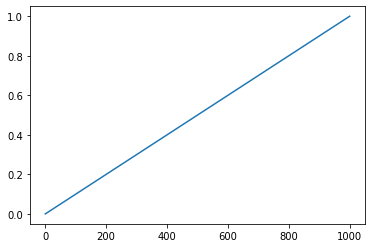

In [66]:
plt.plot(np.linspace(0, NUM_ITER, NUM_ITER), alpha_lin)

In [67]:
alpha_sig_004 = sig(-0.004, NUM_ITER)

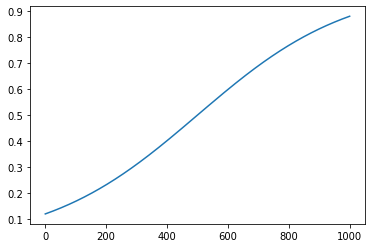

In [68]:
plt.plot(np.linspace(0, NUM_ITER, NUM_ITER), alpha_sig_004)

In [69]:
alpha_sig_06 = sig(-0.06, NUM_ITER)

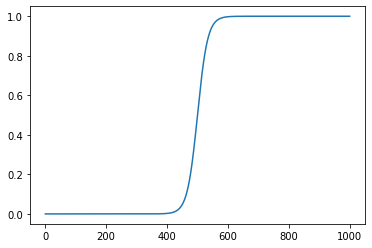

In [70]:
plt.plot(np.linspace(0, NUM_ITER, NUM_ITER), alpha_sig_06)

# Solution

##Paper 1 (P1): Optimizing the Management of Soil Erosion

Nikkami, Davood & Elektorowicz, Maria & MEHUYS, GUY. (2002). Optimizing the Management of Soil Erosion. Water Quality Research Journal in Canada. 37. 10.2166/wqrj.2002.038. 

### Model Parameter

In [71]:
# Variáveis do modelo

Cini = np.array([[10.54394,  0.0469 ,  0.59679,  0.02194],
              [1.41, 4.99, 2.41, 6.24]])

A = np.array([  [1, 0, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [1, 0, 1, 0],
                [1, 1, 1, 1],
                [1, 0, 0, 0],
                [0, 1, 0, 0]])

b = np.array([[557],[1143],[1577],[1700],[10310],[160],[6990]])

### Solution


#### Approach 1

In [72]:
C = Cini

##### Step 1

In [73]:
linearProblem = pulp.LpProblem("First_Objective_Max",pulp.LpMaximize)

X = create_x_variables()

linearProblem += f(C[0], X)

linearProblem = load_model(linearProblem, A, X, b)

solution = linearProblem.solve()

In [74]:
print_solution(solution, linearProblem, X)


Status = Optimal
Value = 6958.9145499999995
x1 = 557.0
x2 = 8610.0
x3 = 1143.0
x4 = 0.0


In [75]:
f1_max = pulp.value(linearProblem.objective)

In [76]:
print(linearProblem)

First_Objective_Max:
MAXIMIZE
10.54394*x1 + 0.0469*x2 + 0.59679*x3 + 0.02194*x4 + 0.0
SUBJECT TO
_C1: x1 <= 557

_C2: x3 <= 1143

_C3: x4 <= 1577

_C4: x1 + x3 <= 1700

_C5: x1 + x2 + x3 + x4 = 10310

_C6: x1 >= 160

_C7: x2 >= 6990

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous



##### Step 2

In [77]:
linearProblem = pulp.LpProblem("Second_Objective_Min",pulp.LpMinimize)

X = create_x_variables()

linearProblem += f(C[1], X)

linearProblem = load_model(linearProblem, A, X, b)

linearProblem += f(C[0], X) >= f1_max

solution = linearProblem.solve()

In [78]:
print(linearProblem)

Second_Objective_Min:
MINIMIZE
1.41*x1 + 4.99*x2 + 2.41*x3 + 6.24*x4 + 0.0
SUBJECT TO
_C1: x1 <= 557

_C2: x3 <= 1143

_C3: x4 <= 1577

_C4: x1 + x3 <= 1700

_C5: x1 + x2 + x3 + x4 = 10310

_C6: x1 >= 160

_C7: x2 >= 6990

_C8: 10.54394 x1 + 0.0469 x2 + 0.59679 x3 + 0.02194 x4 >= 6958.91455

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous



In [79]:
print_solution(solution, linearProblem, X)


Status = Optimal
Value = 46503.9
x1 = 557.0
x2 = 8610.0
x3 = 1143.0
x4 = 0.0


#### Approach 2

In [80]:
C = DataStandardization(Cini)

In [81]:
display(C)

array([[ 1.72976694, -0.61568567, -0.49281856, -0.62126271],
       [-1.21449083,  0.6337035 , -0.69823543,  1.27902275]])

In [82]:
df_solution_lin = run_models(alpha_lin, C, A, b)

In [83]:
df_solution_lin

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,0.000000,Optimal,557.0,8610.0,1143.0,0.0,-3981.632669,-4900.865014,-3981.632669
1,1,0.001001,Optimal,557.0,8610.0,1143.0,0.0,-3982.552821,-4900.865014,-3981.632669
2,2,0.002002,Optimal,557.0,8610.0,1143.0,0.0,-3983.472974,-4900.865014,-3981.632669
3,3,0.003003,Optimal,557.0,8610.0,1143.0,0.0,-3984.393126,-4900.865014,-3981.632669
4,4,0.004004,Optimal,557.0,8610.0,1143.0,0.0,-3985.313279,-4900.865014,-3981.632669
...,...,...,...,...,...,...,...,...,...,...
995,995,0.995996,Optimal,557.0,8610.0,1143.0,0.0,-4897.184404,-4900.865014,-3981.632669
996,996,0.996997,Optimal,557.0,8610.0,1143.0,0.0,-4898.104557,-4900.865014,-3981.632669
997,997,0.997998,Optimal,557.0,8610.0,1143.0,0.0,-4899.024709,-4900.865014,-3981.632669
998,998,0.998999,Optimal,557.0,8610.0,1143.0,0.0,-4899.944862,-4900.865014,-3981.632669


In [84]:
df_solution_sig_004 = run_models(alpha_sig_004, C, A, b)

In [85]:
df_solution_sig_004

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,0.119203,Optimal,557.0,8610.0,1143.0,0.0,-4091.207850,-4900.865014,-3981.632669
1,1,0.119624,Optimal,557.0,8610.0,1143.0,0.0,-4091.594880,-4900.865014,-3981.632669
2,2,0.120046,Optimal,557.0,8610.0,1143.0,0.0,-4091.983091,-4900.865014,-3981.632669
3,3,0.120470,Optimal,557.0,8610.0,1143.0,0.0,-4092.372485,-4900.865014,-3981.632669
4,4,0.120895,Optimal,557.0,8610.0,1143.0,0.0,-4092.763064,-4900.865014,-3981.632669
...,...,...,...,...,...,...,...,...,...,...
995,995,0.879105,Optimal,557.0,8610.0,1143.0,0.0,-4789.734619,-4900.865014,-3981.632669
996,996,0.879530,Optimal,557.0,8610.0,1143.0,0.0,-4790.125198,-4900.865014,-3981.632669
997,997,0.879954,Optimal,557.0,8610.0,1143.0,0.0,-4790.514592,-4900.865014,-3981.632669
998,998,0.880376,Optimal,557.0,8610.0,1143.0,0.0,-4790.902803,-4900.865014,-3981.632669


In [86]:
df_solution_sig_06 = run_models(alpha_sig_06, C, A, b)

In [87]:
df_solution_sig_06

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,9.357623e-14,Optimal,557.0,8610.0,1143.0,0.0,-3981.632669,-4900.865014,-3981.632669
1,1,9.936863e-14,Optimal,557.0,8610.0,1143.0,0.0,-3981.632669,-4900.865014,-3981.632669
2,2,1.055196e-13,Optimal,557.0,8610.0,1143.0,0.0,-3981.632669,-4900.865014,-3981.632669
3,3,1.120513e-13,Optimal,557.0,8610.0,1143.0,0.0,-3981.632669,-4900.865014,-3981.632669
4,4,1.189873e-13,Optimal,557.0,8610.0,1143.0,0.0,-3981.632669,-4900.865014,-3981.632669
...,...,...,...,...,...,...,...,...,...,...
995,995,1.000000e+00,Optimal,557.0,8610.0,1143.0,0.0,-4900.865014,-4900.865014,-3981.632669
996,996,1.000000e+00,Optimal,557.0,8610.0,1143.0,0.0,-4900.865014,-4900.865014,-3981.632669
997,997,1.000000e+00,Optimal,557.0,8610.0,1143.0,0.0,-4900.865014,-4900.865014,-3981.632669
998,998,1.000000e+00,Optimal,557.0,8610.0,1143.0,0.0,-4900.865014,-4900.865014,-3981.632669


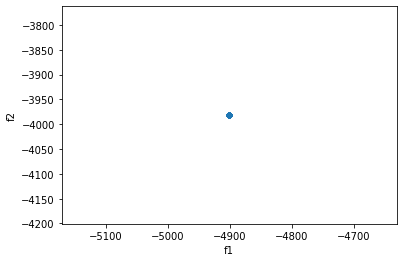

In [88]:
df_solution_sig_06.plot.scatter(x='f1', y='f2')

##Paper 2 (P2): Land Use Scenarios and Optimization in a Watershed.

D. Nikkami, M. Shabani and H. Ahmadi, 2009. Land Use Scenarios and Optimization in a Watershed. Journal of Applied Sciences, 9: 287-295. DOI: 10.3923/jas.2009.287.295

### Model Parameter

In [89]:
# Variáveis do modelo

Cini = np.array([[21.452,  0.101 ,  4.56,  1.013],
              [8.77, 10.47, 12.57, 10.81]])

A = np.array([  [1, 0, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [1, 0, 1, 0],
                [1, 1, 1, 1],
                [1, 0, 0, 0],
                [0, 1, 0, 0]])

b = np.array([[2115],[237],[207],[2352],[13032],[561],[10550]])

### Solution


#### Approach 1

In [90]:
C = Cini

##### Step 1

In [91]:
linearProblem = pulp.LpProblem("First_Objective_Max",pulp.LpMaximize)

X = create_x_variables()

linearProblem += f(C[0], X)

linearProblem = load_model(linearProblem, A, X, b)

solution = linearProblem.solve()

In [92]:
print_solution(solution, linearProblem, X)


Status = Optimal
Value = 47648.94000000001
x1 = 2115.0
x2 = 10550.0
x3 = 237.0
x4 = 130.0


In [93]:
f1_max = pulp.value(linearProblem.objective)

##### Step 2

In [94]:
linearProblem = pulp.LpProblem("Second_Objective_Min",pulp.LpMinimize)

X = create_x_variables()

linearProblem += f(C[1], X)

linearProblem = load_model(linearProblem, A, X, b)

linearProblem += f(C[0], X) >= f1_max

solution = linearProblem.solve()

In [95]:
print_solution(solution, linearProblem, X)


Status = Optimal
Value = 133391.44
x1 = 2115.0
x2 = 10550.0
x3 = 237.0
x4 = 130.0


#### Approach 2

In [96]:
C = DataStandardization(Cini)

In [97]:
display(C)

array([[ 1.69949799, -0.77389975, -0.25734875, -0.66824949],
       [-1.39737973, -0.13714337,  1.4196192 ,  0.1149039 ]])

In [98]:
df_solution_lin = run_models(alpha_lin, C, A, b)

In [99]:
df_solution_lin

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,0.000000,Optimal,2115.0,10917.0,0.0,0.0,4452.652297,-4854.225349,4452.652297
1,1,0.001001,Optimal,2115.0,10917.0,0.0,0.0,4443.336103,-4854.225349,4452.652297
2,2,0.002002,Optimal,2115.0,10917.0,0.0,0.0,4434.019909,-4854.225349,4452.652297
3,3,0.003003,Optimal,2115.0,10917.0,0.0,0.0,4424.703715,-4854.225349,4452.652297
4,4,0.004004,Optimal,2115.0,10917.0,0.0,0.0,4415.387521,-4854.225349,4452.652297
...,...,...,...,...,...,...,...,...,...,...
995,995,0.995996,Optimal,2115.0,10550.0,237.0,130.0,-4682.957109,-4718.068226,4050.933423
996,996,0.996997,Optimal,2115.0,10550.0,237.0,130.0,-4691.734888,-4718.068226,4050.933423
997,997,0.997998,Optimal,2115.0,10550.0,237.0,130.0,-4700.512667,-4718.068226,4050.933423
998,998,0.998999,Optimal,2115.0,10550.0,237.0,130.0,-4709.290447,-4718.068226,4050.933423


In [100]:
df_solution_sig_004 = run_models(alpha_sig_004, C, A, b)

In [101]:
df_solution_sig_004

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,0.119203,Optimal,2115.0,10917.0,0.0,0.0,3343.245286,-4854.225349,4452.652297
1,1,0.119624,Optimal,2115.0,10917.0,0.0,0.0,3339.326755,-4854.225349,4452.652297
2,2,0.120046,Optimal,2115.0,10917.0,0.0,0.0,3335.396269,-4854.225349,4452.652297
3,3,0.120470,Optimal,2115.0,10917.0,0.0,0.0,3331.453805,-4854.225349,4452.652297
4,4,0.120895,Optimal,2115.0,10917.0,0.0,0.0,3327.499341,-4854.225349,4452.652297
...,...,...,...,...,...,...,...,...,...,...
995,995,0.879105,Optimal,2115.0,10550.0,237.0,130.0,-3657.941673,-4718.068226,4050.933423
996,996,0.879530,Optimal,2115.0,10550.0,237.0,130.0,-3661.667595,-4718.068226,4050.933423
997,997,0.879954,Optimal,2115.0,10550.0,237.0,130.0,-3665.382210,-4718.068226,4050.933423
998,998,0.880376,Optimal,2115.0,10550.0,237.0,130.0,-3669.085540,-4718.068226,4050.933423


In [102]:
df_solution_sig_06 = run_models(alpha_sig_06, C, A, b)

In [103]:
df_solution_sig_06

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,9.357623e-14,Optimal,2115.0,10917.0,0.0,0.0,4452.652297,-4854.225349,4452.652297
1,1,9.936863e-14,Optimal,2115.0,10917.0,0.0,0.0,4452.652297,-4854.225349,4452.652297
2,2,1.055196e-13,Optimal,2115.0,10917.0,0.0,0.0,4452.652297,-4854.225349,4452.652297
3,3,1.120513e-13,Optimal,2115.0,10917.0,0.0,0.0,4452.652297,-4854.225349,4452.652297
4,4,1.189873e-13,Optimal,2115.0,10917.0,0.0,0.0,4452.652297,-4854.225349,4452.652297
...,...,...,...,...,...,...,...,...,...,...
995,995,1.000000e+00,Optimal,2115.0,10550.0,237.0,130.0,-4718.068226,-4718.068226,4050.933423
996,996,1.000000e+00,Optimal,2115.0,10550.0,237.0,130.0,-4718.068226,-4718.068226,4050.933423
997,997,1.000000e+00,Optimal,2115.0,10550.0,237.0,130.0,-4718.068226,-4718.068226,4050.933423
998,998,1.000000e+00,Optimal,2115.0,10550.0,237.0,130.0,-4718.068226,-4718.068226,4050.933423


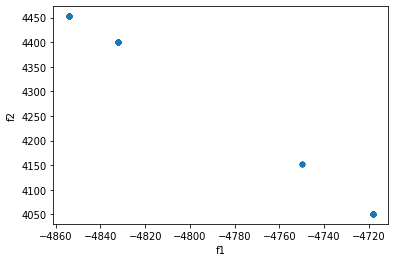

In [104]:
df_solution_lin.plot.scatter(x='f1', y='f2')

##Paper 3 (P3): Land use optimization in watershed scale

Sadeghi, Seyed Hamidreza & Jalili, Khalil & Nikkami, Davood. (2009). Land use optimization in watershed scale. Land Use Policy. 26. 186-193. 10.1016/j.landusepol.2008.02.007. 

### Model Parameter

In [105]:
# Variáveis do modelo

Cini = np.array([[8.5042,  0.1562 ,  4.8758,  0.3215],
              [7.389, 8.144, 7.389, 21.112]])

A = np.array([  [1, 0, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [1, 0, 1, 0],
                [1, 1, 1, 1],
                [1, 0, 0, 0],
                [0, 1, 0, 0]])

b = np.array([[518.81],[4044.64],[1464.37],[4663.37],[9041.83],[38.32],[4001.27]])

### Solution


#### Approach 1

In [106]:
C = Cini

##### Step 1

In [107]:
linearProblem = pulp.LpProblem("First_Objective_Max",pulp.LpMaximize)

X = create_x_variables()

linearProblem += f(C[0], X)

linearProblem = load_model_2(linearProblem, A, X, b)

solution = linearProblem.solve()

In [108]:
print_solution(solution, linearProblem, X)


Status = Optimal
Value = 24911.308953
x1 = 518.81
x2 = 4001.27
x3 = 4044.64
x4 = 477.11


In [109]:
f1_max = pulp.value(linearProblem.objective)

##### Step 2

In [110]:
linearProblem = pulp.LpProblem("Second_Objective_Min",pulp.LpMinimize)

X = create_x_variables()

linearProblem += f(C[1], X)

linearProblem = load_model_2(linearProblem, A, X, b)

linearProblem += f(C[0], X) >= f1_max

solution = linearProblem.solve()

In [111]:
print_solution(solution, linearProblem, X)


Status = Optimal
Value = 76378.42125
x1 = 518.81
x2 = 4001.27
x3 = 4044.64
x4 = 477.11


#### Approach 2

In [112]:
C = DataStandardization(Cini)

In [113]:
display(C)

array([[ 1.4516308 , -0.95288407,  0.40652518, -0.90527191],
       [-0.61962927, -0.49037935, -0.61962927,  1.72963789]])

In [114]:
df_solution_lin = run_models_2(alpha_lin, C, A, b)

In [115]:
df_solution_lin

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,0.000000,Optimal,518.81,4478.38,4044.64,0.0,5023.752258,-1870.008394,5023.752258
1,1,0.001001,Optimal,518.81,4478.38,4044.64,0.0,5016.851597,-1870.008394,5023.752258
2,2,0.002002,Optimal,518.81,4478.38,4044.64,0.0,5009.950936,-1870.008394,5023.752258
3,3,0.003003,Optimal,518.81,4478.38,4044.64,0.0,5003.050274,-1870.008394,5023.752258
4,4,0.004004,Optimal,518.81,4478.38,4044.64,0.0,4996.149613,-1870.008394,5023.752258
...,...,...,...,...,...,...,...,...,...,...
995,995,0.995996,Optimal,518.81,4001.27,4044.64,0.0,-1390.532368,-1415.377875,4789.787368
996,996,0.996997,Optimal,518.81,4001.27,4044.64,0.0,-1396.743745,-1415.377875,4789.787368
997,997,0.997998,Optimal,518.81,4001.27,4044.64,0.0,-1402.955121,-1415.377875,4789.787368
998,998,0.998999,Optimal,518.81,4001.27,4044.64,0.0,-1409.166498,-1415.377875,4789.787368


In [116]:
df_solution_sig_004 = run_models_2(alpha_sig_004, C, A, b)

In [117]:
df_solution_sig_004

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,0.119203,Optimal,518.81,4478.38,4044.64,0.0,4201.995845,-1870.008394,5023.752258
1,1,0.119624,Optimal,518.81,4478.38,4044.64,0.0,4199.093322,-1870.008394,5023.752258
2,2,0.120046,Optimal,518.81,4478.38,4044.64,0.0,4196.181945,-1870.008394,5023.752258
3,3,0.120470,Optimal,518.81,4478.38,4044.64,0.0,4193.261696,-1870.008394,5023.752258
4,4,0.120895,Optimal,518.81,4478.38,4044.64,0.0,4190.332559,-1870.008394,5023.752258
...,...,...,...,...,...,...,...,...,...,...
995,995,0.879105,Optimal,518.81,4001.27,4044.64,0.0,-665.205768,-1415.377875,4789.787368
996,996,0.879530,Optimal,518.81,4001.27,4044.64,0.0,-667.842324,-1415.377875,4789.787368
997,997,0.879954,Optimal,518.81,4001.27,4044.64,0.0,-670.470878,-1415.377875,4789.787368
998,998,0.880376,Optimal,518.81,4001.27,4044.64,0.0,-673.091447,-1415.377875,4789.787368


In [118]:
df_solution_sig_06 = run_models_2(alpha_sig_06, C, A, b)

In [119]:
df_solution_sig_06

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,9.357623e-14,Optimal,518.81,4478.38,4044.64,0.0,5023.752258,-1870.008394,5023.752258
1,1,9.936863e-14,Optimal,518.81,4478.38,4044.64,0.0,5023.752258,-1870.008394,5023.752258
2,2,1.055196e-13,Optimal,518.81,4478.38,4044.64,0.0,5023.752258,-1870.008394,5023.752258
3,3,1.120513e-13,Optimal,518.81,4478.38,4044.64,0.0,5023.752258,-1870.008394,5023.752258
4,4,1.189873e-13,Optimal,518.81,4478.38,4044.64,0.0,5023.752258,-1870.008394,5023.752258
...,...,...,...,...,...,...,...,...,...,...
995,995,1.000000e+00,Optimal,518.81,4001.27,4044.64,0.0,-1415.377875,-1415.377875,4789.787368
996,996,1.000000e+00,Optimal,518.81,4001.27,4044.64,0.0,-1415.377875,-1415.377875,4789.787368
997,997,1.000000e+00,Optimal,518.81,4001.27,4044.64,0.0,-1415.377875,-1415.377875,4789.787368
998,998,1.000000e+00,Optimal,518.81,4001.27,4044.64,0.0,-1415.377875,-1415.377875,4789.787368


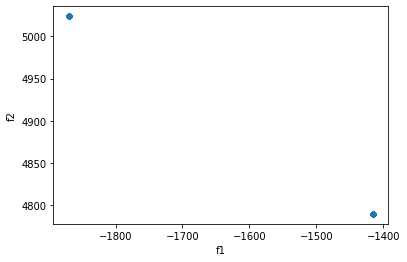

In [120]:
df_solution_lin.plot.scatter(x='f1', y='f2')